/var/folders/mn/p3n41n2s2ds6rf395xzp2f7w0000gn/T/ipykernel_52365/83730543.py:8: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  pivot_df = df.pivot(


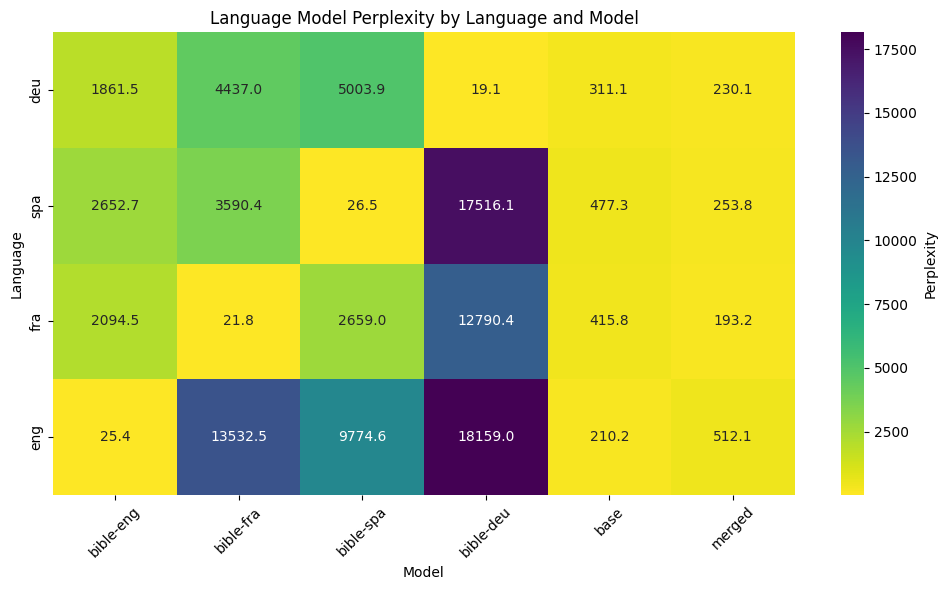

In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv('../dare_ties_results.csv')

pivot_df = df.pivot(
    index='lang',
    columns='model',
    values='perplexity'
)

pivot_pandas = pivot_df.to_pandas().set_index('lang')

row_order = ['deu', 'spa', 'fra', 'eng']
column_order = ['bible-eng', 'bible-fra', 'bible-spa', 'bible-deu', 'base', 'merged']

pivot_reordered = pivot_pandas.reindex(index=row_order, columns=column_order)

plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_reordered,
    annot=True,
    fmt='.1f',
    cmap='viridis_r',
    cbar_kws={'label': 'Perplexity'}
)

plt.title('Language Model Perplexity by Language and Model')
plt.xlabel('Model')
plt.ylabel('Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()